<a href="https://colab.research.google.com/github/kspviswa/slicenet-pages/blob/main/E2E_Slicenet_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install slicenet



# Using Slicenet Simulator to simulate 2 Slices and visualize the Slice Composition and Slice Utilization ratios of NFs

## 1. Import Slicenet

In [2]:
from slicenet.cloud import Cloud
from slicenet.nf import Nf
from slicenet.nfMgr import NfMgr
from slicenet.sliceMgr import SliceMgr
from slicenet.staticslice import StaticSlice
from slicenet.service import Service

from tabulate import tabulate
import random
import logging
logger = logging.getLogger('example')

logging.basicConfig(format='%(asctime)s %(name)s %(module)s %(levelname)s: %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p', level=logging.INFO)

## 2. Create Simulation Topology (Clouds & NFs)

In [3]:
clouds = []
nfs = []

# Create Cloud Objects
clouds.append(Cloud(1000, 10, 10000, name="edge cloud"))
clouds.append(Cloud(2000, 20, 20000, name="wan cloud"))

# Create NF Objects
nf1 = Nf('NF 1', 100,9,1234)
nf2 = Nf('NF 2', 100,9,1234)
nf3 = Nf('NF 3', 200,1,1234)
nf4 = Nf('NF 4', 200,1,1234)

nfs.append(nf1)
nfs.append(nf2)
nfs.append(nf3)
nfs.append(nf4)

# Set NF Schedular policy - This will help NfMgr to schedule NFs into the cloud
# First available method chooses the first available cloud according to NF requirements.
NfMgr.setSchedularPolicy('first-available-method')

# Register the clouds with NfMgr
for c in clouds:
    NfMgr.registerCloud(c)

# Deploy NFs into the cloud
for n in nfs:
    NfMgr.deployNf(n)

## 3. Add Slices to the infrastructure

### Create 3 Slices (Vedio Streaming , Emergency Slice & Security Slice)

In [4]:
# Create slice objects by specifying the slice composition & % resource allocation
# For eg, VS slice will take 20% of Nf 1 resource. 20% of Nf 2 resource etc.
vs_slice = StaticSlice("Vedio Streaming Slice")
vs_slice.composeSlice(nf1.id, 20)
vs_slice.composeSlice(nf2.id, 20)
vs_slice.composeSlice(nf3.id, 20)
vs_slice.composeSlice(nf4.id, 20)

es_slice = StaticSlice("Emergency Slice")
es_slice.composeSlice(nf1.id, 50)
es_slice.composeSlice(nf2.id, 34)
es_slice.composeSlice(nf3.id, 60)
es_slice.composeSlice(nf4.id, 12)

ss_slice = StaticSlice("Security Slice")
ss_slice.composeSlice(nf1.id, 10)
ss_slice.composeSlice(nf2.id, 10)
ss_slice.composeSlice(nf3.id, 10)
ss_slice.composeSlice(nf4.id, 10)

# Use Slice Manager to deploy the slices
SliceMgr.deploySlice(vs_slice)
SliceMgr.deploySlice(es_slice)
SliceMgr.deploySlice(ss_slice)

#Dump Slice information
SliceMgr.dumpSlices()

┌──────────────────────────────────────┬───────────────────────┬─────────────────────────┐
│ Slice ID                             │ Slice Name            │   Slice Availablity (%) │
├──────────────────────────────────────┼───────────────────────┼─────────────────────────┤
│ 38b055c5-440b-4f32-b287-05785b2a73ae │ Vedio Streaming Slice │                     100 │
├──────────────────────────────────────┼───────────────────────┼─────────────────────────┤
│ 92aa951d-40c4-4c4c-a2ce-a8d76a22482e │ Emergency Slice       │                     100 │
├──────────────────────────────────────┼───────────────────────┼─────────────────────────┤
│ ad5c13f6-166c-4863-a8cf-b14968d7c79f │ Security Slice        │                     100 │
└──────────────────────────────────────┴───────────────────────┴─────────────────────────┘


## 4. Now dump the slice utilization details for each NF

In [5]:
NfMgr.dumpNfInfoSliceDetails()

┌──────────────┬──────────────────────────────────────┬───────────┬───────────────────────────────┐
│ Cloud Name   │ NF ID                                │ NF Name   │   Overall Utilization Ratio % │
├──────────────┼──────────────────────────────────────┼───────────┼───────────────────────────────┤
│ edge cloud   │ d64dba50-9a87-4837-9047-db3c873b4cb8 │ NF 1      │                            80 │
├──────────────┼──────────────────────────────────────┼───────────┼───────────────────────────────┤
│ wan cloud    │ 5cc70826-67e8-4e92-83e1-28863abcfafe │ NF 2      │                            64 │
├──────────────┼──────────────────────────────────────┼───────────┼───────────────────────────────┤
│ edge cloud   │ 8e34d222-188a-4c7a-9b12-46d0209fb081 │ NF 3      │                            90 │
├──────────────┼──────────────────────────────────────┼───────────┼───────────────────────────────┤
│ wan cloud    │ 9f7da27d-0e69-4e69-b589-3071f84fe88c │ NF 4      │                            42 │


## 5. Also visualize the data

### Visualize the cloud utilization ratio of all clouds

edge cloud
wan cloud


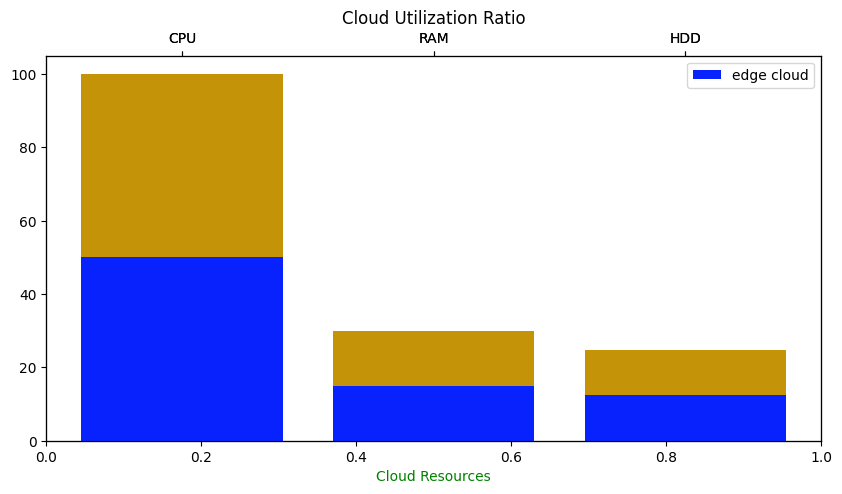

┌──────────────────────────────────────┬────────────┬──────────┬──────────┬──────────┐
│ Cloud ID                             │ Name       │   RAM(%) │   CPU(%) │   HDD(%) │
├──────────────────────────────────────┼────────────┼──────────┼──────────┼──────────┤
│ 033d378c-68f7-453d-8ff3-4726b0a5e0b5 │ edge cloud │       30 │      100 │    24.68 │
├──────────────────────────────────────┼────────────┼──────────┼──────────┼──────────┤
│ 31fc96e4-aa18-4914-bbe9-786543b345d6 │ wan cloud  │       15 │       50 │    12.34 │
└──────────────────────────────────────┴────────────┴──────────┴──────────┴──────────┘


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.legend import Legend

import random

cloudUtilDicts = []
legends = []

for c in clouds:
  cloudUtilDicts.append(NfMgr.getCloudUtilRatio(c.id))

x = np.array(['CPU', 'RAM', 'HDD'])

fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Cloud Utilization Ratio')

i=0
col = ['r', 'g']

def getRandColor():
  rgb = [random.uniform(0, 1),
         random.uniform(0, 1),
         random.uniform(0, 1),]
  return rgb

for d in cloudUtilDicts:
  y = np.array([d['cpu'], d['ram'], d['hdd']])
  ax_ = ax.twiny()
  col = getRandColor()
  c = clouds[cloudUtilDicts.index(d)]
  print (c.name)
  legends.append(c.name)
  ax_.bar(x, y, color = col, label = c.name)

# giving labels to the axises
ax.set_xlabel('Cloud Resources', color = 'g')
#ax.legend(legends)
#ax.set_ylabel('Cloud 1 Util Ratio', color = 'g')

# secondary y-axis label
#ax2.set_ylabel('Cloud 2 Util Ratio', color = 'b')

# defining display layout
#plt.tight_layout()

# show legend
plt.legend(legends)

# show plot
plt.show()

NfMgr.dumpCloudInfo()

### Visualize Slice Utilization ratio of each NF

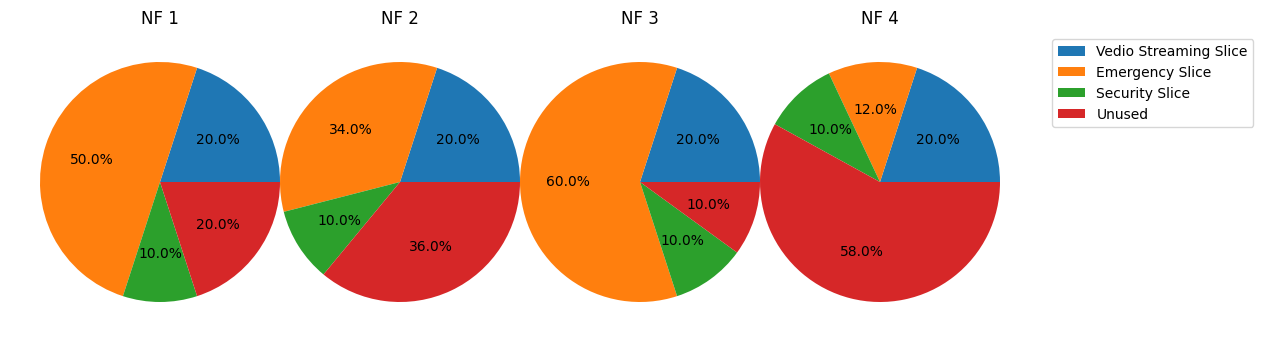

In [8]:
import matplotlib.pyplot as plt

#labels = ["Video Streaming Slice", "Emergency Slice", "Unused"]

'''
fig = plt.figure(figsize=(10, 6))
'''
fig = plt.figure(figsize=(6,6))
sep = 0

for n in nfs:
  weights = []
  labels = []
  for k,v in n.slices.items():
    weights.append(v)
    labels.append(SliceMgr.slices[k].name)
  weights.append(n.getRemainingCapacity())
  labels.append("Unused")
  ax_ = fig.add_axes([0+sep, 0, .5, .5], aspect=1)
  '''
  ax_.pie(weights, labels=labels, radius = 1, autopct='%1.1f%%')
  '''
  ax_.pie(weights, radius = 1, autopct='%1.1f%%')
  ax_.set_title(n.name)
  sep += 0.4

plt.legend(labels, bbox_to_anchor=(1.05, 1.0))
plt.show()

## Cloud Resources to Slice Mapping

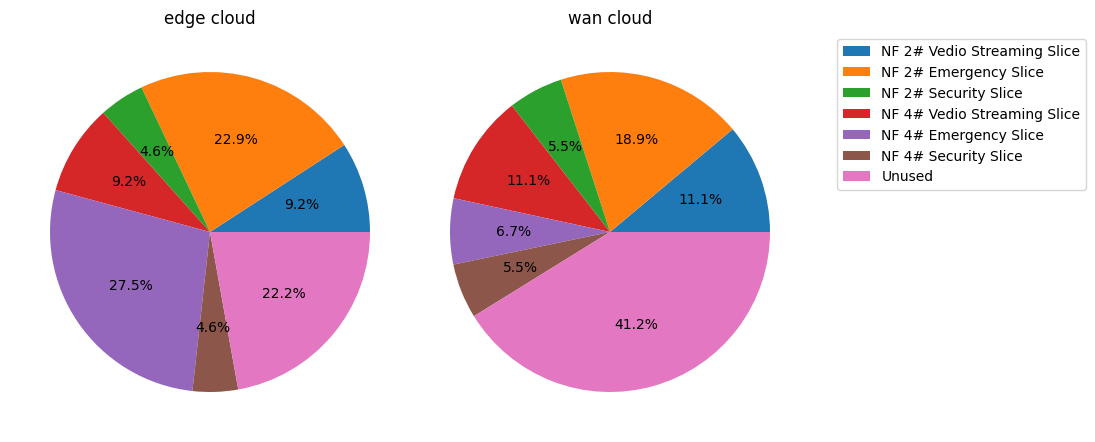

In [9]:
import matplotlib.pyplot as plt
'''
fig = plt.figure(figsize=(25, 10))
'''
fig = plt.figure(figsize=(8, 8))
sep = 0

for c in clouds:
  weights = []
  labels = []
  nfs = c.deployedNfs
  for n in nfs:
    for k,v in NfMgr.nfs[n].slices.items():
      nfname = NfMgr.nfs[n].name
      slicename = SliceMgr.slices[k].name
      weights.append(v)
      labels.append(f"{nfname}# {slicename}")
  weights.append((100 - c.returnAvgCloudUtilRatio())/100)
  #weights.append(0)
  labels.append('Unused')
  ax_ = fig.add_axes([0+sep, 0, .5, .5], aspect=1)
  '''
  ax_.pie(weights, labels=labels, radius = 1, autopct='%1.1f%%')
  '''
  ax_.pie(weights, radius = 1, autopct='%1.1f%%')
  ax_.set_title(c.name)
  sep += 0.5

plt.legend(labels, bbox_to_anchor=(1.05, 1.0))

'''
plt.legend(bbox_to_anchor=(1,0),
           bbox_transform=plt.gcf().transFigure,
           title="Slice Distribution in Cloud")
'''
plt.show()
